In [1]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
SEED=11

In [9]:
def callback(**kwargs):
    stats.append(kwargs)
    if 'fitness' in kwargs:
        return not((int)(kwargs['fitness'])==0)
    elif 'done' in kwargs:
        return not(kwargs['done'])
    else:
        return True

In [53]:
input_sizes=[25,50,100]

# Randomized Hill Climbing

In [55]:
problem=mlrose.MaxKColorGenerator.generate(SEED,number_of_nodes=50,max_colors=5)
problem.find_neighbors()
len(problem.neighbors)

200

==========Input Size 25=================
[ 9  1 11  1  7  1  2  2  8  0  0  4  2  1 10  5 11  7  4  0  3  8  4  1
  3] 0.0
Number of Iterations: 116
Number of Fitness Evaluations: 122
Average Fitness Evaluations per Iteration: 1.052
Wall Clock Time: 0.005744
==========Input Size 50=================
[16 22 23 13 12  1  7 19  4  7 14  0 14  2  4  2 12  1 10 22 21  2 20 17
 24  6 17  3  6 11 18  9  0 15  0 15  6 11 10 20 15 14  7  9  2  0  8 22
  3  5] 0.0
Number of Iterations: 412
Number of Fitness Evaluations: 433
Average Fitness Evaluations per Iteration: 1.051
Wall Clock Time: 0.05892
==========Input Size 100=================
[46 33 23 42  8 19 10 35  5 35  7  9 46 25 40 41 43 18 21 19  7 20  4 20
 13 33 26 39 18  1 19 16 31 30 32 31 36 14 32 11 34 10  0  7 42 37 47  1
 44 37 46 25 26 14 28 10 45 28 48 45  5 12  6  3 31 38 23 27 11  3 16 29
 43 27 47 36 17 12 40  4 34 34 22 18 41  2  2 48 40 17 15 35  8  6 32 42
 21 39 18 27] 0.0
Number of Iterations: 1091
Number of Fitness Evaluation

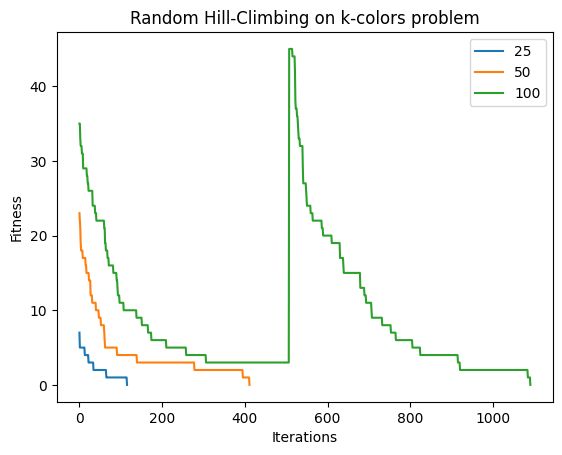

In [57]:
rhc_results=dict()
for input_size in input_sizes:
    problem=mlrose.MaxKColorGenerator.generate(SEED,number_of_nodes=input_size,max_connections_per_node=(int)(input_size/2),max_colors=(int)(input_size/2))


    stats=[]
    
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.random_hill_climb(problem,
                                                       random_state=SEED,
                                                        restarts=100,
                                                        max_attempts=200,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    rhc_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Random Hill-Climbing on k-colors problem")
plt.legend(loc='best')

# Simulated Annealing

In [58]:
input_size=50

problem=mlrose.MaxKColorGenerator.generate(SEED,number_of_nodes=input_size,max_connections_per_node=(int)(input_size/2),max_colors=(int)(input_size/2))


temperature=[0.001,0.01,0.1,1,10]*5
decay=[0.001,0.1,0.5,0.9]
temperature_list=[mlrose.GeomDecay(init_temp=t, decay=d) for t in temperature for d in decay]
sa = mlrose.SARunner(problem=problem,
              experiment_name='sa',
              output_directory=None,
              seed=None,
              iteration_list=[10000],
              max_attempts=200,
              temperature_list=temperature_list)

# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()
df_run_stats['init_temp']=df_run_stats['Temperature'].apply(lambda x: x.init_temp)
df_run_stats['decay']=df_run_stats['Temperature'].apply(lambda x: x.decay)


best_fitness = df_run_stats['Fitness'].min()

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['init_temp','decay']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'])

Fitness  FEvals      Time
init_temp decay                           
0.001     0.001      0.0   280.4  0.048147
0.010     0.500      0.0   282.6  0.050112
0.100     0.100      0.0   316.0  0.055183
0.010     0.001      0.0   337.0  0.058139
          0.100      0.0   347.8  0.060773
10.000    0.900      0.0   351.2  0.063062
1.000     0.900      0.0   370.0  0.065812
10.000    0.100      0.0   370.6  0.067094
0.001     0.900      0.0   371.2  0.063999
          0.100      0.0   395.2  0.068876
0.100     0.001      0.0   409.4  0.071931
1.000     0.001      0.0   414.0  0.072188
10.000    0.500      0.0   424.8  0.076007
0.100     0.900      0.0   437.0  0.076606
0.010     0.900      0.0   452.6  0.078277
0.100     0.500      0.0   465.0  0.081277
1.000     0.100      0.0   469.4  0.084711
0.001     0.500      0.0   481.8  0.082660
10.000    0.001      0.0   532.8  0.094870
1.000     0.500      0.0   534.0  0.096038

==========Input Size 25=================
[ 4  2  3  1  7  3  2  5  8  0  1  4  1  9 10  5  3  0  3 10  6 11  8  2
  6] 0.0
Number of Iterations: 39
Number of Fitness Evaluations: 58
Average Fitness Evaluations per Iteration: 1.487
Wall Clock Time: 0.002906
==========Input Size 50=================
[16  9 23  3 10  1  2 19 23 10 12  4 14  7  7  6 21 22 13 22 16 13 20  6
  8  5 22 17 15  2 15 20 15 20 24 22  1 11 10 17 17 14  7  3 24 15 15  8
  0 13] 0.0
Number of Iterations: 245
Number of Fitness Evaluations: 349
Average Fitness Evaluations per Iteration: 1.424
Wall Clock Time: 0.047663
==========Input Size 100=================
[25  2 42 17 23 47 26 37  4  2  0 13 29 32 22 48  9 19 33 19  5 41 42 20
 36 12 17 44  1  0 38  1 28  6 32 24 30 12 34 20 27 48 36 16 43  9  1 14
 45 42  5  7 11  7 14 20  8 26 36 20 16 31 19 21  7 47 40  6 46  5 21 25
 10 39 40  4 35 40 39 24 48 24  4 21 26 34 27  9 49 43 15 24 27 35 13 31
  3 49 44 13] 0.0
Number of Iterations: 823
Number of Fitness Evaluations:

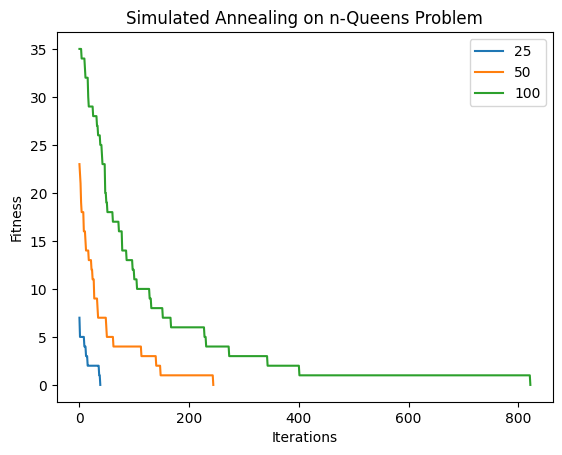

In [59]:
sa_results=dict()
for input_size in input_sizes:
    problem=mlrose.MaxKColorGenerator.generate(SEED,number_of_nodes=input_size,max_connections_per_node=(int)(input_size/2),max_colors=(int)(input_size/2))
    stats=[]
    
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.simulated_annealing(problem,
              schedule=mlrose.GeomDecay(init_temp=0.001, decay=0.1, min_temp=0.001),
               max_attempts=200,
               random_state=SEED,
               state_fitness_callback=callback,callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    sa_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Simulated Annealing on n-Queens Problem")
plt.legend(loc='best')

# Genetic

In [61]:
input_size=50
problem=mlrose.MaxKColorGenerator.generate(SEED,number_of_nodes=input_size,max_connections_per_node=(int)(input_size/2),max_colors=(int)(input_size/2))
ga=mlrose.GARunner(problem=problem,
                  experiment_name="ga",
                  output_directory=None,
                  seed=None,
                  iteration_list=[10000],
                  max_attempts=10,
                  population_sizes=[10,25,50,100]*5,
                  mutation_rates=np.arange(0.1,1,0.1))

df_run_stats, df_run_curves = ga.run()
best_fitness = df_run_stats['Fitness'].min()
#df_run_stats[df_run_stats['Fitness']==best_fitness].groupby(['Fitness','Population Size','Mutation Rate','State']).agg({'Iteration':'min','Time':'min','FEvals':'min'}).sort_values('FEvals')

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['Population Size','Mutation Rate']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'])

Fitness  FEvals      Time
Population Size Mutation Rate                           
50              0.4                0.0  1631.0  0.240220
                0.6                0.0  1814.6  0.267360
                0.3                0.0  1927.4  0.282615
100             0.5                0.0  3664.8  0.538666
25              0.8                0.2   972.0  0.144269
                0.7                0.2   988.0  0.146431
50              0.1                0.2  1537.0  0.225258
                0.9                0.2  1740.8  0.256362
                0.8                0.2  1906.6  0.280333
25              0.5                0.4   997.8  0.147545
50              0.7                0.4  1834.8  0.270313
25              0.4                0.8   951.4  0.140676
100             0.1                0.8  3583.8  0.522255
25              0.9                1.0   924.0  0.137612
100             0.4                1.0  3239.2  0.476020
10              0.9                1.2   504.4  0.076867
100             0.8                1.2  3583.0  0.526946
                0.6                1.2  3785.8  0.556275
10              0.7                1.6   478.2  0.072800
25              0.2                1.6   724.8  0.107582
100             0.2                1.6  3360.8  0.490505
                0.9                1.6  3521.4  0.521262
50              0.2                1.8  1495.8  0.219204
                0.5                1.8  1527.8  0.226440
10              0.8                2.0   509.6  0.077592
25              0.3                2.0   896.2  0.132540
                0.1                2.2   970.0  0.143665
                0.6                2.2  1032.0  0.152819
100             0.3                2.2  3137.4  0.459687
10              0.6                2.6   464.6  0.070732
                0.3                3.4   468.0  0.070628
                0.4                3.6   445.6  0.067603
100             0.7                4.2  2711.4  0.401428
10              0.5                4.6   391.2  0.059932
                0.2                5.0   449.8  0.067969
                0.1                7.0   316.2  0.048471

==========Input Size 25=================
[ 2  0 11  1  0  0  8  1  5  0 10  3  8  7  9  5 10  6 11  2  4 10  3 10
  6] 0.0
Number of Iterations: 18
Number of Fitness Evaluations: 921
Average Fitness Evaluations per Iteration: 51.167
Wall Clock Time: 0.046337
==========Input Size 50=================
[24 20  6  3 19 24 19 17 17  4  8 17 24 12  5  7  1 16 15 16 10 21 16 14
  7 13  5 23  9  0 22  8 11  1  8  3 24  4 18  1 23 12 12 22  0 21 15 15
 18 11] 0.0
Number of Iterations: 47
Number of Fitness Evaluations: 2408
Average Fitness Evaluations per Iteration: 51.234
Wall Clock Time: 0.354709
==========Input Size 100=================
[ 9 31 15 13 18  5 40 32 46 44 11 22 19 44 24  3 14  6 24 38 32 23 14 27
 35  9 40  1 25 27  5 32 30 49 32 28 33  8 48  6 42 36 34 47  5  8  4 45
 41 34 35 15 49 12 39 21 43 41 48 33 33 12 37 30  4 15  7 19 39  5 22 29
 31  8 30  0 16 40 21 14 39 37 15 30 20 46 34 21 41  0 17 13 20 10 38 13
 10  1  1  4] 0.0
Number of Iterations: 54
Number of Fitness Evaluation

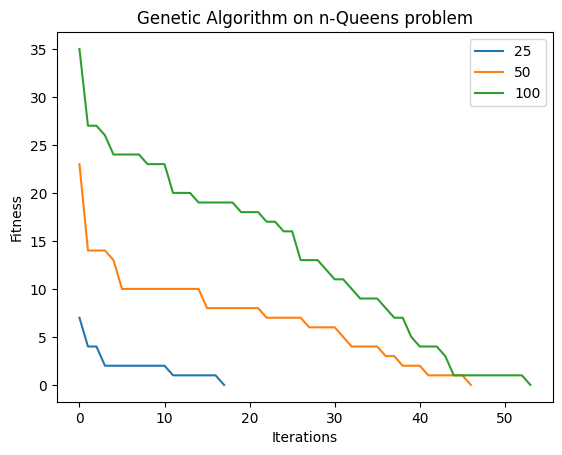

In [63]:
ga_results=dict()
for input_size in input_sizes:
    problem=mlrose.MaxKColorGenerator.generate(SEED,number_of_nodes=input_size,max_connections_per_node=(int)(input_size/2),max_colors=(int)(input_size/2))
    stats=[]
    
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.genetic_alg(problem,
                                                             pop_size=50,
                                                             mutation_prob=0.6,
                                                               random_state=SEED,
                                                             max_attempts=10,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    ga_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Genetic Algorithm on n-Queens problem")
plt.legend(loc='best')

# MIMIC

In [64]:
input_size=50
problem=mlrose.MaxKColorGenerator.generate(SEED,number_of_nodes=input_size,max_connections_per_node=(int)(input_size/2),max_colors=(int)(input_size/2))
mmc = mlrose.MIMICRunner(problem=problem,
                          experiment_name="mimic", 
                          seed=None,
                          iteration_list=[1000], 
                          population_sizes=[50,100,150,200]*5,
                          keep_percent_list=np.arange(0.1,1,0.1), 
                          max_attempts=10, generate_curves=False, use_fast_mimic=True)

df_run_stats, df_run_curves = mmc.run()
best_fitness = df_run_stats['Fitness'].min()
df_run_stats[df_run_stats['Fitness']==best_fitness].groupby(['Fitness','Population Size','Keep Percent','State']).agg({'Iteration':'min','FEvals':'min','Time':'min'}).sort_values('FEvals')

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['Population Size','Keep Percent']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'])

Fitness  FEvals      Time
Population Size Keep Percent                           
200             0.2               0.0  1610.6  0.183811
                0.3               0.0  1811.6  0.237642
150             0.2               0.2  1391.6  0.200519
100             0.3               0.4  1134.0  0.220606
150             0.3               0.4  1724.0  0.269548
200             0.4               0.4  2535.8  0.375101
150             0.6               0.4  2841.6  0.550210
200             0.5               0.4  3137.6  0.510832
100             0.5               0.6  1700.0  0.368292
150             0.4               0.6  2206.6  0.380631
200             0.1               0.6  2212.8  0.331249
150             0.5               0.6  2661.0  0.480430
100             0.4               0.8  1437.0  0.294936
150             0.7               0.8  2810.6  0.577724
200             0.7               0.8  4143.4  0.787266
                0.6               1.0  3418.6  0.605507
100             0.7               1.2  1840.6  0.436876
                0.8               1.2  1941.6  0.482826
                0.2               1.4  1455.8  0.292097
150             0.1               1.4  2085.4  0.362301
100             0.6               1.4  2224.6  0.511171
150             0.8               1.6  2749.6  0.596510
200             0.8               1.6  3660.0  0.732991
50              0.5               1.8   889.8  0.265441
200             0.9               1.8  3941.6  0.844518
150             0.9               2.0  2477.6  0.562499
100             0.9               2.2  1415.2  0.370987
50              0.7               2.4   827.8  0.264245
                0.8               2.4   858.2  0.279266
                0.6               2.6   787.4  0.240442
100             0.1               2.6  1293.4  0.261603
50              0.3               3.0   684.6  0.188434
                0.2               3.4   643.2  0.172873
                0.9               3.4   858.6  0.289902
                0.4               3.6   632.8  0.176102
                0.1               5.0   612.0  0.173720

==========Input Size 25=================
[10  9  0  5  7 11  4  5  8 11  0  6  6  5  4  8  5  2  7 10  2 10  1  5
  8] 0.0
Number of Iterations: 6
Number of Fitness Evaluations: 4208
Average Fitness Evaluations per Iteration: 701.333
Wall Clock Time: 0.553191
==========Input Size 50=================
[ 3 14 20 17 21 12 18  4  4  3  3  6 15  4 20 24  5 21 14 12 11  2 18  6
  2  1 10 13 21 23 22  1  0  9 19 19  0 17 10  0 19  8 23  8  2 15 24  9
  7 22] 0.0
Number of Iterations: 12
Number of Fitness Evaluations: 8419
Average Fitness Evaluations per Iteration: 701.583
Wall Clock Time: 4.712988
==========Input Size 100=================
[ 2  9 12 13 20 35 19 47 16  9 26 13 38 26 18 24  5 33 43 37 20 15 30 49
 16 34  6  7 35 49  8  3 39 14 31  7 13 49 11  6 48 44 23 49 47 25 42 22
  0 48 41 41 29 47 28 15 35 41  9 43 28 39 34 27 21 39 47 24 36 25 45  1
 33 48 37 43 42 17 31 19  5 26  1  3 31 40 47 12 14 21 29  1 31  0 26 10
 11  6  5  7] 4.0
Number of Iterations: 21
Number of Fitness Evaluati

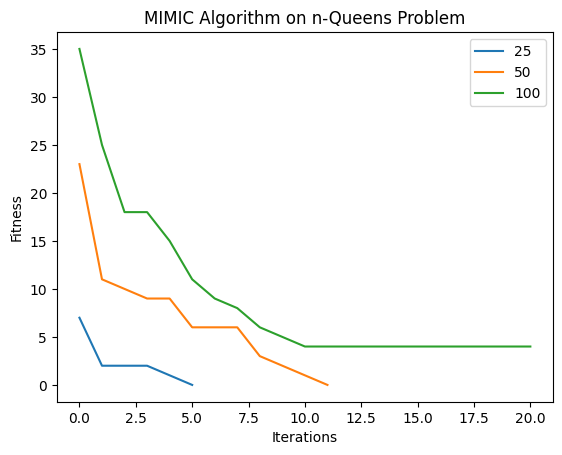

In [81]:
mimic_results=dict()
for input_size in input_sizes:
    problem=mlrose.MaxKColorGenerator.generate(SEED,number_of_nodes=input_size,max_connections_per_node=(int)(input_size/2),max_colors=(int)(input_size/2))
    problem.reset()
    stats=[]
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.mimic(problem,
                                                       pop_size=700,
                                                       keep_pct=0.1,
                                                       max_attempts=10,
                                                       random_state=SEED,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    mimic_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"MIMIC Algorithm on n-Queens Problem")
plt.legend(loc='best')

# Comparison

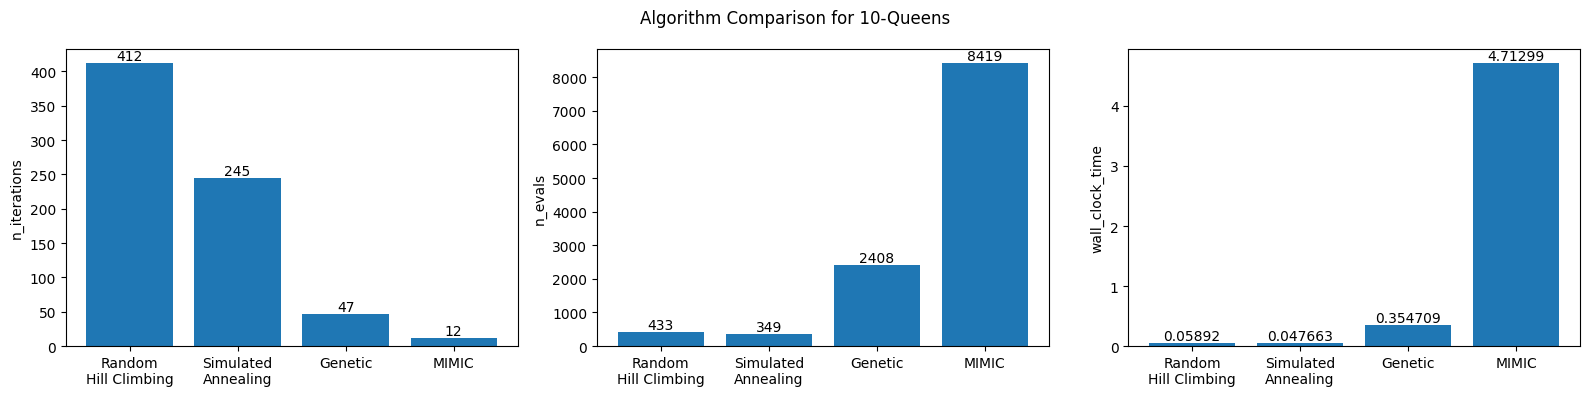

In [91]:
input_size=50
x=['Random\nHill Climbing','Simulated\nAnnealing','Genetic','MIMIC']
y=[rhc_results,sa_results,ga_results,mimic_results]
plots=['n_iterations','n_evals','wall_clock_time']
fig,axs=plt.subplots(1,3,figsize=(16,4))
best_fitness=min([alg[input_size]['best_fitness'] for alg in y])

for p,ax in zip(plots,axs):
    bars=[]
    bars.append(ax.bar(x,[alg[input_size][p] for alg in y]))
    for bar in bars:
        for b,alg in zip(bar,y):
            if alg[input_size]['best_fitness']!=best_fitness:
                b.set(hatch='/')
        ax.bar_label(bar)
                
    ax.set_ylabel(p)
plt.suptitle("Algorithm Comparison for 10-Queens")
plt.tight_layout()